In [26]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


In [40]:
df=pd.read_csv('/content/50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [62]:
sns.set_style('whitegrid')
sns.set_palette('rainbow')

# Model 1

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [43]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


<Axes: >

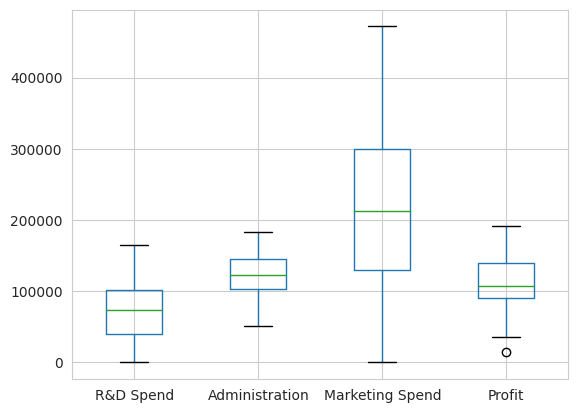

In [44]:
df.boxplot()

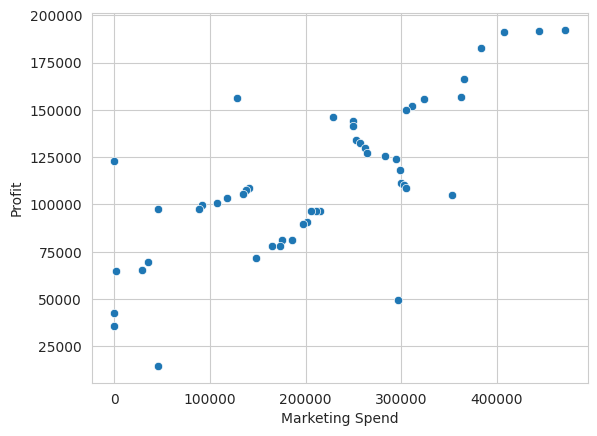

In [48]:
sns.scatterplot(x='Marketing Spend',y='Profit',data=df);

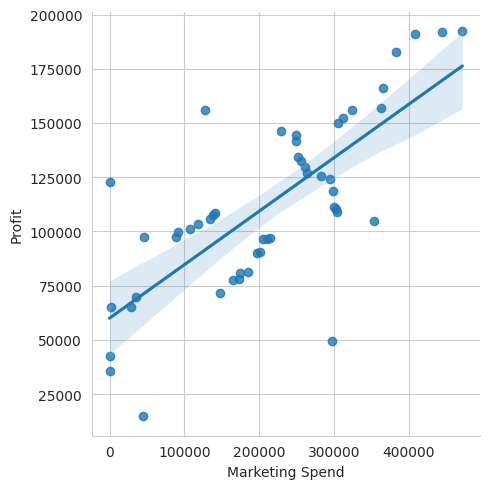

In [49]:
sns.lmplot(x='Marketing Spend',y='Profit',data=df);

In [50]:
df[df['Profit']<15000]

,R&D Spend,Administration,Marketing Spend,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [51]:
df[(df['Marketing Spend']==0) & (df['R&D Spend']==0)]

,R&D Spend,Administration,Marketing Spend,State,Profit
47,0.0,135426.92,0.0,California,42559.73


In [52]:
df[df['Marketing Spend']==0]

,R&D Spend,Administration,Marketing Spend,State,Profit
19,86419.70,153514.11,0.0,New York,122776.86
47,0.00,135426.92,0.0,California,42559.73
48,542.05,51743.15,0.0,New York,35673.41


In [53]:
df[df['R&D Spend']==0]

,R&D Spend,Administration,Marketing Spend,State,Profit
47,0.0,135426.92,0.00,California,42559.73
49,0.0,116983.80,45173.06,California,14681.40


<Axes: ylabel='Profit'>

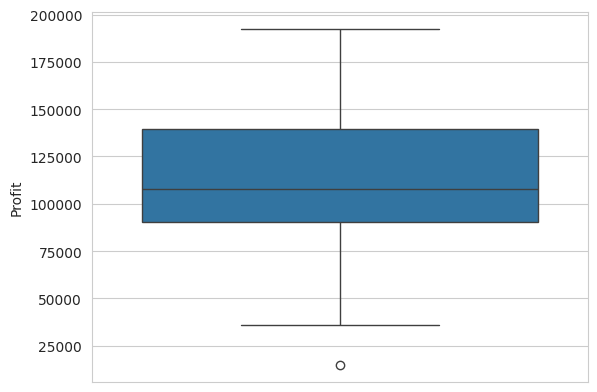

In [54]:
sns.boxplot(df['Profit'])

In [55]:
df[df['Profit']==14681.40]

,R&D Spend,Administration,Marketing Spend,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [56]:
df.drop(index=49,inplace=True)

<Axes: ylabel='Profit'>

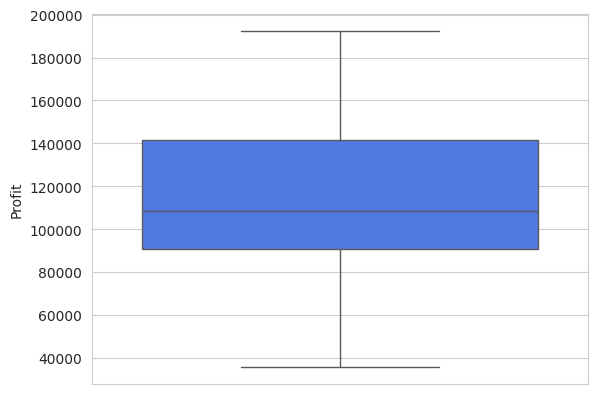

In [64]:
# I will drop the outlier then I plot the boxplot again

sns.boxplot(df['Profit'])

In [59]:
df.corr(numeric_only=True)

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.243438,0.711654,0.978437
Administration,0.243438,1.000000,-0.037280,0.205841
Marketing Spend,0.711654,-0.037280,1.000000,0.739307
Profit,0.978437,0.205841,0.739307,1.000000


<Axes: >

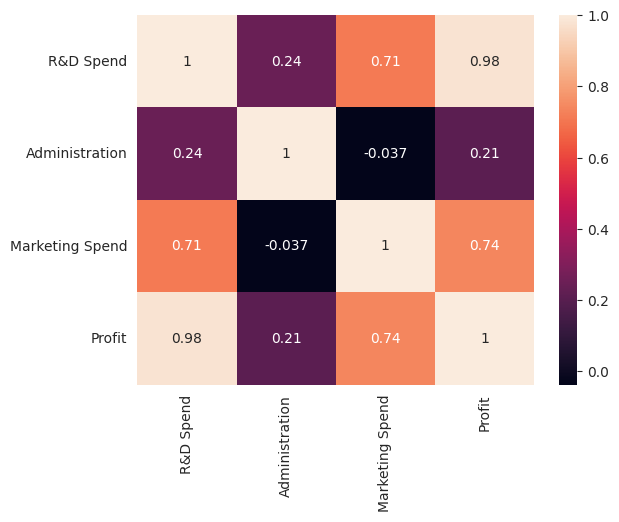

In [63]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [65]:
'''
Profit= Coeff* R&D Spend + Intercept

The simplest Linear model to predict profit

'''

X=df[['R&D Spend']]
y=df['Profit']

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [74]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [86]:
x_train

,R&D Spend
12,93863.75
4,142107.34
34,46426.07
8,120542.52
3,144372.41
6,134615.46
40,28754.33
41,27892.92
46,1315.46
15,114523.61


In [78]:
type(x_train)

pandas.core.frame.DataFrame

In [76]:
Scaler=StandardScaler()
x_train_scaled=Scaler.fit_transform(x_train)
x_test_scaled=Scaler.transform(x_test)

In [79]:
x_train_scaled.shape

(39, 1)

In [80]:
Regressor1=LinearRegression()
Regressor1.fit(x_train_scaled,y_train)

LinearRegression()

In [85]:
Regressor1.coef_,Regressor1.intercept_

(array([37796.83707742]), 118337.95102564101)

In [81]:
#Predicted values for regressor 1 after training it using x_train.
'''
Profit= Coeff* R&D Spend + Intercept
      = 37796*R&D + 118337.95
'''


y_pred1=Regressor1.predict(x_test_scaled)
y_pred1

array([128310.02517853,  53193.70057973,  52367.98547028,  70676.26957638,
       130509.86006871, 111894.62916838, 114553.86885386, 105750.33562492,
       102837.61015965, 123709.62893638])

In [89]:
Results1=pd.DataFrame({'Actual':y_test,'Predicted':y_pred1})
Results1.head()

,Actual,Predicted
13,134307.35,128310.025179
45,64926.08,53193.700580
47,42559.73,52367.985470
44,65200.33,70676.269576
17,125370.37,130509.860069


In [87]:
Training_Score1=Regressor1.score(x_train_scaled,y_train)
Training_Score1

0.9568714853097023

In [88]:
Testing_Score1=Regressor1.score(x_test_scaled,y_test)
Testing_Score1

0.940383500308983

In [95]:
df[df['R&D Spend']<1000]

,R&D Spend,Administration,Marketing Spend,State,Profit
47,0.00,135426.92,0.0,California,42559.73
48,542.05,51743.15,0.0,New York,35673.41


In [97]:
Z=Scaler.transform([[1000]])
Z

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-1.72354211]])

In [100]:
df[df['R&D Spend']==1000]

,R&D Spend,Administration,Marketing Spend,State,Profit


In [98]:
Regressor1.predict([[-1.72354211]])

array([53193.51069791])

In [101]:
Z1=Scaler.transform([[1000000]])
Z1

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[20.09573636]])

In [102]:
Regressor1.predict([[20.09573636]])

array([877893.22417527])

# Model 2

In [110]:
from sklearn.preprocessing import LabelEncoder

<ipython-input-105-bcd193679842>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['State'],palette='husl')


<Axes: xlabel='count', ylabel='State'>

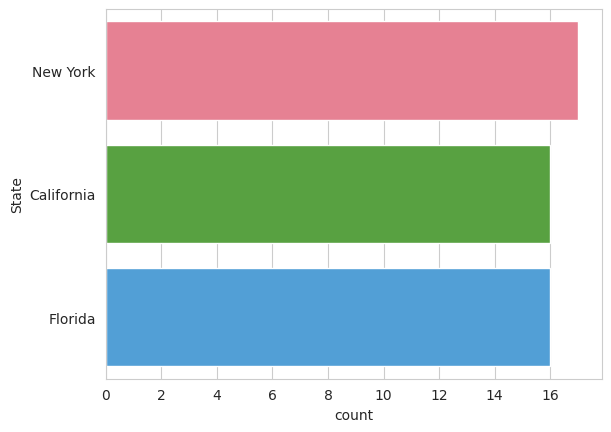

In [105]:
sns.countplot(y=df['State'],palette='husl')

In [113]:
Encoder=LabelEncoder()

In [112]:
df['State']=Encoder.fit_transform(df['State'])

In [114]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [116]:
df.corr()

,R&D Spend,Administration,Marketing Spend,State,Profit
R&D Spend,1.000000,0.243438,0.711654,0.067359,0.978437
Administration,0.243438,1.000000,-0.037280,0.008080,0.205841
Marketing Spend,0.711654,-0.037280,1.000000,0.045313,0.739307
State,0.067359,0.008080,0.045313,1.000000,0.044876
Profit,0.978437,0.205841,0.739307,0.044876,1.000000


<Axes: >

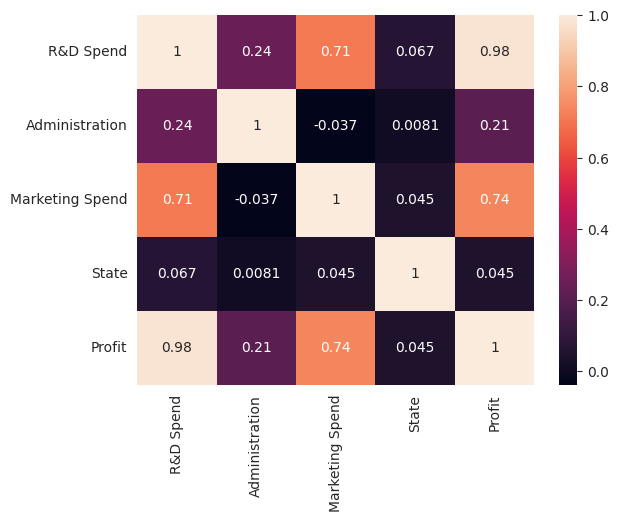

In [115]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [117]:
X1=df.drop('Profit',axis=1)
y1=df['Profit']

In [118]:
X1

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,2
1,162597.70,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1
5,131876.90,99814.71,362861.36,2
6,134615.46,147198.87,127716.82,0
7,130298.13,145530.06,323876.68,1
8,120542.52,148718.95,311613.29,2
9,123334.88,108679.17,304981.62,0


In [119]:
y1

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94
5,156991.12
6,156122.51
7,155752.60
8,152211.77
9,149759.96


In [120]:
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.2,random_state=42)

In [121]:
X1_train

,R&D Spend,Administration,Marketing Spend,State
12,93863.75,127320.38,249839.44,1
4,142107.34,91391.77,366168.42,1
34,46426.07,157693.92,210797.67,0
8,120542.52,148718.95,311613.29,2
3,144372.41,118671.85,383199.62,2
6,134615.46,147198.87,127716.82,0
40,28754.33,118546.05,172795.67,0
41,27892.92,84710.77,164470.71,1
46,1315.46,115816.21,297114.46,1
15,114523.61,122616.84,261776.23,2


In [ ]:
'''
df.drop('State',axis=1,inplace=True)

'''

In [122]:
X1_train.shape

(39, 4)

In [123]:
y1_train.shape

(39,)

In [124]:
X1_test.shape

(10, 4)

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        49 non-null     float64
 1   Administration   49 non-null     float64
 2   Marketing Spend  49 non-null     float64
 3   State            49 non-null     int64  
 4   Profit           49 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 2.0 KB


In [127]:
scaler2=StandardScaler()

In [128]:
X1_train_scaled=scaler2.fit_transform(X1_train)
X1_test_scaled=scaler2.transform(X1_test)

In [129]:
X1_train_scaled

array([[ 0.30470616,  0.38031277,  0.12192758,  0.        ],
       [ 1.35840018, -0.8648537 ,  1.19281295,  0.        ],
       [-0.73138588,  1.43295894, -0.2374778 , -1.27475488],
       [ 0.88740037,  1.12191624,  0.69059682,  1.27475488],
       [ 1.40787184,  0.0805834 ,  1.34959644,  1.27475488],
       [ 1.19476913,  1.06923531, -1.0022921 , -1.27475488],
       [-1.11735647,  0.07622359, -0.5873114 , -1.27475488],
       [-1.13617063, -1.09639501, -0.66394817,  0.        ],
       [-1.71665211, -0.01838361,  0.55712548,  0.        ],
       [ 0.75594063,  0.21730367,  0.23181364,  1.27475488],
       [ 0.94838863, -0.26572975,  0.6295479 , -1.27475488],
       [-0.04148956,  0.18197846,  0.25547063, -1.27475488],
       [-0.06265579, -0.59142737, -0.88392578,  1.27475488],
       [-0.53333323, -0.46055854, -0.20215438,  0.        ],
       [-0.39135438, -0.0244461 , -1.33908661,  0.        ],
       [ 1.86602842,  0.71223439,  2.1650753 ,  1.27475488],
       [-1.40672073,  0.

In [130]:
Regressor2=LinearRegression()

In [131]:
Regressor2.fit(X1_train_scaled,y1_train)

LinearRegression()

In [132]:
Regressor2.coef_,Regressor2.intercept_

(array([34932.30452099,  -455.28536272,  4286.21164878, -1128.9155082 ]),
 118337.95102564101)

In [135]:
y_pred2=Regressor2.predict(X1_test_scaled)
y_pred2

array([129325.31318731,  47308.27567741,  49170.30953963,  66903.28866533,
       129509.19430124, 115362.43513765, 110356.03427772, 103885.48046612,
        96145.06708912, 111941.5661042 ])

In [133]:
Training_Score2=Regressor2.score(X1_train_scaled,y1_train)
Training_Score2

0.9640143842074951

In [134]:
Testing_Score2=Regressor2.score(X1_test_scaled,y1_test)
Testing_Score2

0.9187681545894943

# This model is better in behavior and using all the features but it has slight overfitting. We can evaluate the model using another metrics.

In [136]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [138]:
#Model 1 Evaluation
MAE1=mean_absolute_error(y_test,y_pred1)
MAE1

6180.0860850467125

In [140]:
MSE1=mean_squared_error(y_test,y_pred1)
RMSE=np.sqrt(MSE1)
RMSE

6954.926411608045

In [142]:
# Model 2 Evaluation
MAE2=mean_absolute_error(y1_test,y_pred2)
MAE2


6572.146939739987

In [143]:
MSE2=mean_squared_error(y1_test,y_pred2)
RMSE2=np.sqrt(MSE2)
RMSE2

8118.437699630795

# Definitely, Model 1 is better than model 2 from the comparison of RMSE, RMSE1= 6945, RMSE2= 8118.

In [144]:
from xgboost import XGBRegressor

In [145]:
Regresssor3=XGBRegressor()

In [146]:
Regresssor3.fit(X1_train_scaled,y1_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [147]:
y_pred3=Regresssor3.predict(X1_test_scaled)

In [148]:
y_pred3

array([125900.64 ,  35676.9  ,  35676.848,  73574.33 , 130631.64 ,
       110366.766, 108379.734,  97569.01 ,  94362.484, 110228.31 ],
      dtype=float32)

In [149]:
RMSE3=np.sqrt(mean_squared_error(y1_test,y_pred3))
RMSE3

11709.067320445616

In [150]:
MAE3=mean_absolute_error(y1_test,y_pred3)
MAE3

9168.364734375002